In [2]:
import numpy as np                   #Ce module permet d’effectuer des calculs numériques avec Python
import matplotlib.pyplot as plt      #Ce module permet de créer et personnaliser des graphiques
import sounddevice as sd  

def texte_vers_ascii(texte):
    ascii_liste = [ord(char) for char in texte]
    return ascii_liste

def ascii_vers_binaire(ascii_liste):
    binaire_liste = [bin(ascii_val)[2:].zfill(8) for ascii_val in ascii_liste]
    return binaire_liste

def encodage(data, key):
    data_with_zeros = data + '0' * (len(key) - 1)
    remainder = Division_eucl(data_with_zeros, key)
    encoded_data = data + remainder[1:]
    return encoded_data

# Entrée du message
message_texte = str(input('Entrez le message à envoyer : '))

# Conversion du texte en ASCII puis en binaire
ascii_resultat = texte_vers_ascii(message_texte)
binaire_resultat = ascii_vers_binaire(ascii_resultat)
total_binary = ''.join(binaire_resultat)
print(f"Texte : {message_texte}")
print(f"Valeurs ASCII : {ascii_resultat}")
print(f"Valeurs binaires : {binaire_resultat}")
print(f'Le message en binaire est :{total_binary}')
def xor(a, b):
    resultat = []
    for i in range(1, len(b)):
        if a[i] == b[i]:
            resultat.append('0')
        else:
            resultat.append('1')
    return ''.join(resultat)

# Définition de la fonction division euclidienne
def Division_eucl(divident, diviseur):
    val = len(diviseur)
    tmp = divident[0:val]
    while val < len(divident):
        if tmp[0] == '1':
            tmp = xor(diviseur, tmp) + divident[val]
        else:
            tmp = xor('0' * val, tmp) + divident[val]
        val += 1
    if tmp[0] == '1':
        tmp = xor(diviseur, tmp)
    else:
        tmp = xor('0' * val, tmp)
    check = tmp
    return check

# Fonction Main
total_binary = ''.join(binaire_resultat)  # Utilisez le résultat binaire de la conversion du texte en ASCII

data = total_binary
key = '11010'

print("Les données à envoyer sont :", data)
print("La clé CRC est:", key)

data_crc = encodage(data, key)
print("Les données encodées avec la clé key sont :", data_crc)
message_bool = [bit == '1' for bit in data_crc]

# Codage Manchester du message
message_code = []
for ii in range(len(message_bool)):
    if message_bool[ii]:
        message_code.extend([1, 0])
    else:
        message_code.extend([0, 1])

print("Message codé avec Manchester :", message_code)

Texte : zbi 
Valeurs ASCII : [122, 98, 105, 32]
Valeurs binaires : ['01111010', '01100010', '01101001', '00100000']
Le message en binaire est :01111010011000100110100100100000
Les données à envoyer sont : 01111010011000100110100100100000
La clé CRC est: 11010
Les données encodées avec la clé key sont : 01111010011000100110100100100000010
Message codé avec Manchester : [0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1]


[0.0, 0.9893554255245747, 0.28794045010251906, -0.9055536888925841, -0.5514913743150942, 0.745048504960584, 0.7683291217331284, -0.5214352033794981, -0.9200868048537143, 0.2536545839095076, 0.9939100368057142, 0.03561143311112636, -0.9835457412105524, -0.32186104181006375, 0.8898718088114687, 0.5808479362589049, -0.7208227371708802, -0.7906350542454085, 0.49071755200393835, 0.9334527203256263, -0.2190469374748193, -0.9972037971811801, -0.07117769039543966, 0.9764883538925819, 0.3553733281669926, -0.8730610582747539, -0.6094676481666174, 0.6956825506034832, 0.8119380057158565, -0.45937738787877447, -0.9456344796221884, 0.18416141324508123, 0.9992325282639969, 0.10665365333511861, -0.9681922164062943, -0.38843479627469796, 0.8551427630053468, 0.6373142037445798, -0.6696598375080248, -0.8322109517210735, 0.4274544683993961, 0.9566166292499507, -0.14904226617617447, -0.9999936564536084, -0.14199431795762474, 0.9586678530366605, 0.4210035051320267, -0.8361396537313595, -0.6643522775070521, 

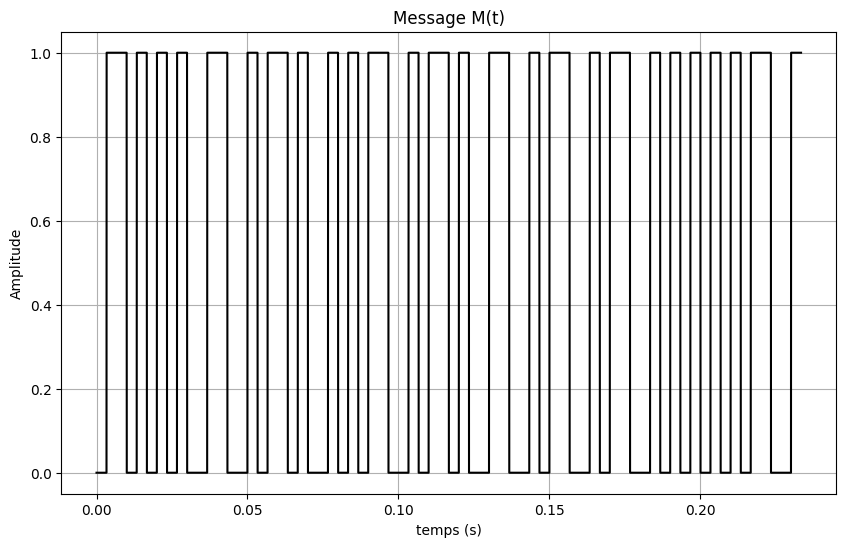

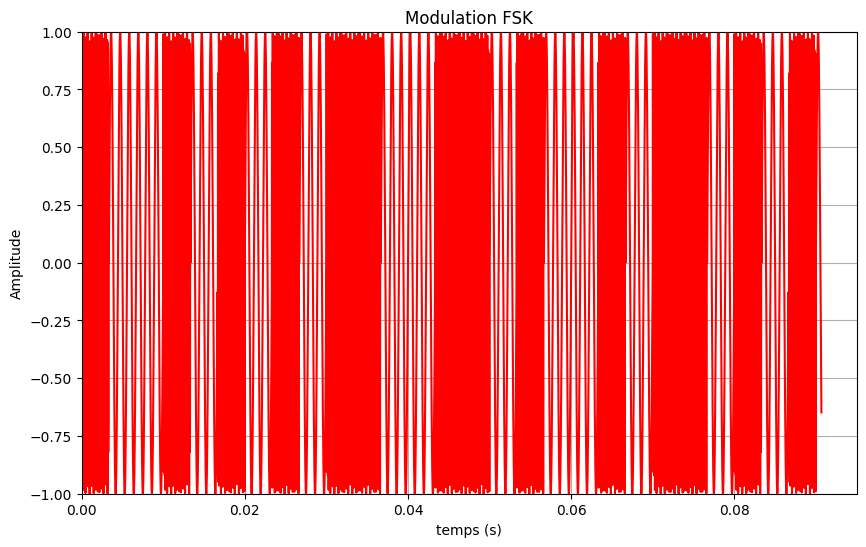

In [3]:
M = message_code                           #Stockage du mesage dans une variable "M"
Fe = 44100                                 #Initialisation de la fréquence d'échantillonnage à 88 200Hz (soit le double de 44 100Hz)
Fp = 10000                                #Initialisation de la fréquence de la porteuse à 35 000Hz (Pour que le son sot inaudible)
baud = 300                                 #Initialisation du débit souhaité sur le canal de transmission à 600bit/s
Nbits = len(M)                             #Initialisation du nombre de bits initial
Ns = Fe/baud                               #Initialisation du nombre de symboles par bit (Fréquence d'échantillonnage/débit binaire)
N = Nbits*Ns                               #Initialisation du nombre de bits total à moduler (Nombre de symbole par bits*Nombre de bits)

M_duplique = np.repeat(M,Ns)                                                  # On génère le message binaire dupliqué

t = np.arange (0.0,N)/Fe                                                      #On génère le vecteur temps

# Génération des 2 porteuse P1 pour le bit 1 et P2 pour le bit 0
A1 =  1                                        
A2 =  1                  
fp1 =  900                
fp2 =  10000 
P1 =  A1*np.sin(2*np.pi*fp1*t)                                               
P2 =  A2*np.sin(2*np.pi*fp2*t)

FSK=[P1[i] if M_duplique[i]==1 else P2[i] for i in range(len(M_duplique))] 
plt.figure (figsize = (10,6))
plt.plot(t,M_duplique,'Black')
plt.title('Message M(t)')
plt.xlabel('temps (s)')
plt.ylabel('Amplitude')
plt.grid()

#Affichage du signal modulé
plt.figure (figsize = (10,6))
plt.plot(t[0:4000],FSK[0:4000],'r')
plt.title('Modulation FSK')
plt.xlabel('temps (s)')
plt.ylabel('Amplitude')
plt.axis([0,0.095,-1,1])
plt.grid()
sd.play(FSK,Fe)
print(FSK)

La modulation avec ASK est :[0.         0.         0.         ... 0.99537911 0.97165868 0.92824754]


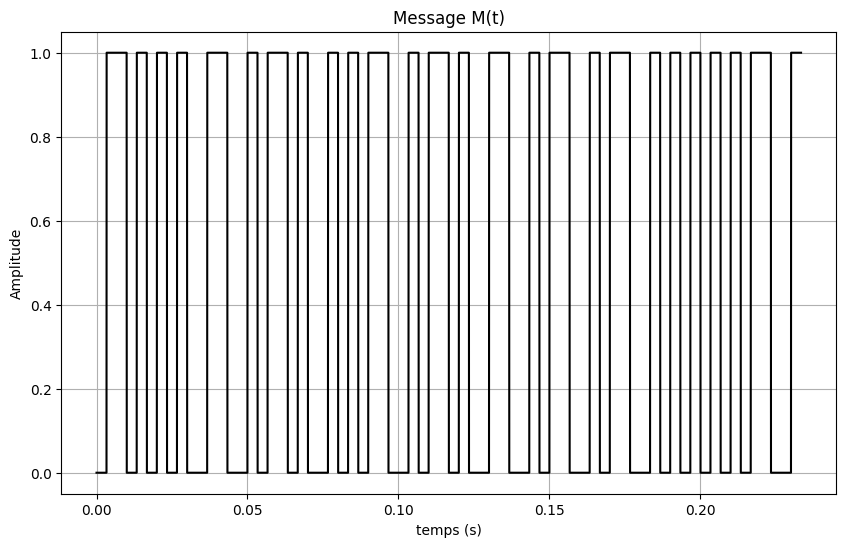

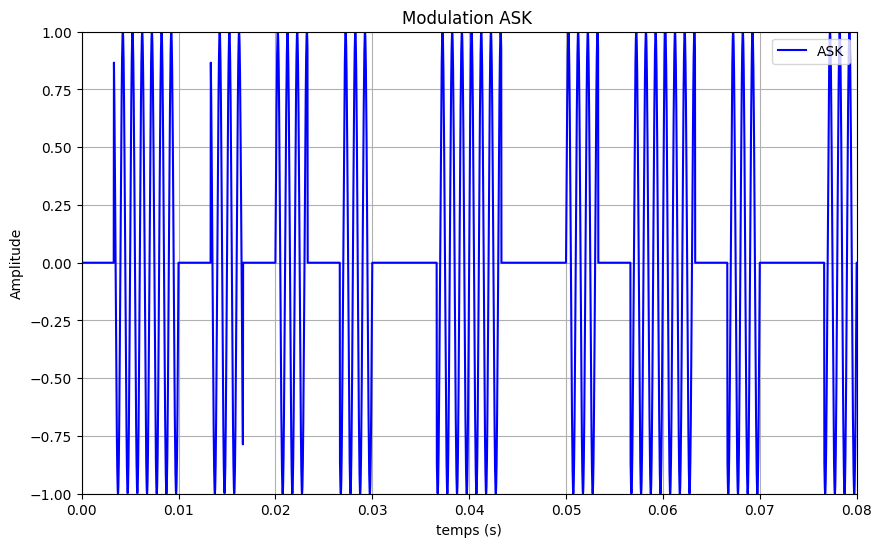

In [4]:
Fe = 44100
baud = 300
Ns = int(Fe / baud)
Nbits = len(message_code)
N = int(Nbits * Ns)

# Duplication du message binaire
M_duplique = np.repeat(message_code, Ns)

t = np.arange(0.0, N) / Fe

# Génération de la porteuse
Ap = 1
Fp = 1000
Porteuse = Ap * np.sin(2 * np.pi * Fp * t)

# Modulation ASK
ASK = Porteuse * M_duplique
print(f'La modulation avec ASK est :{ASK}')
plt.figure (figsize = (10,6))
plt.plot(t,M_duplique,'Black')
plt.title('Message M(t)')
plt.xlabel('temps (s)')
plt.ylabel('Amplitude')
plt.grid()

# Affichage du signal modulé ASK et FSK
plt.figure(figsize=(10, 6))
plt.plot(t, ASK, 'b', label='ASK')
plt.title('Modulation ASK ')
plt.xlabel('temps (s)')
plt.ylabel('Amplitude')
plt.axis([0,0.08,-1,1])
plt.legend()
plt.grid()
plt.show()

# Émission du message sous forme de signal (Jouer le son)
sd.play(ASK, Fe)
sd.wait()

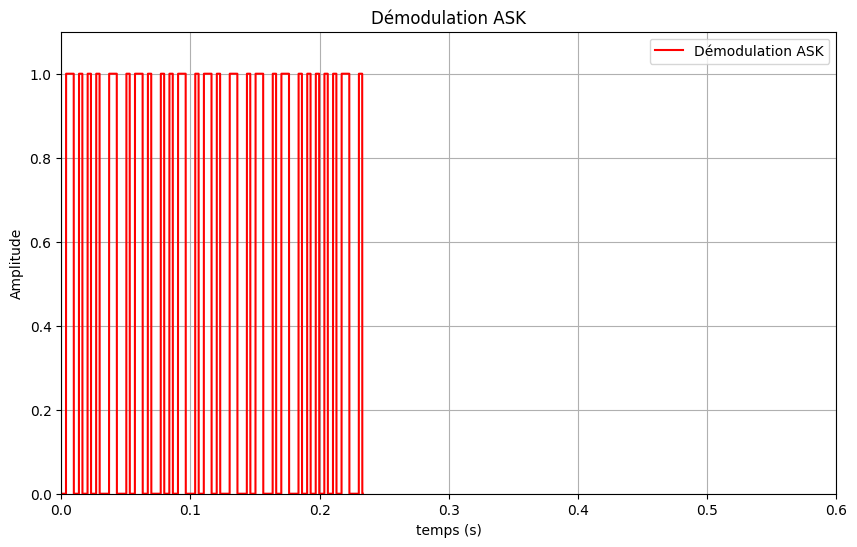

In [5]:
import numpy as np
import sounddevice as sd
import matplotlib.pyplot as plt

# Paramètres de la modulation
Fe = 44100
baud = 300
Ns = int(Fe / baud)
Fp = 1000
Ap = 1

# Génération de la porteuse
t = np.arange(0.0, N) / Fe
Porteuse = Ap * np.sin(2 * np.pi * Fp * t)

# Réception du signal modulé ASK
signal_recu = ASK * Porteuse

# Filtre passe-bas pour extraire le signal de base
fc = Fp  # fréquence de coupure
w = 2 * np.pi * fc / Fe
b, a = np.ones(Ns) / Ns, [1, -np.exp(-1j * w)]
signal_base = np.convolve(signal_recu, b, mode='same')

# Décodage avec un seuil
seuil = 0.3
message_decode = np.where(signal_base > seuil, 1, 0)

# Affichage du signal démodulé
plt.figure(figsize=(10, 6))
plt.plot(t, message_decode, 'r', label='Démodulation ASK')
plt.title('Démodulation ASK')
plt.xlabel('temps (s)')
plt.ylabel('Amplitude')
plt.axis([0, 0.6, 0, 1.1])
plt.legend()
plt.grid()
plt.show()
sd.play(message_decode,Fe)


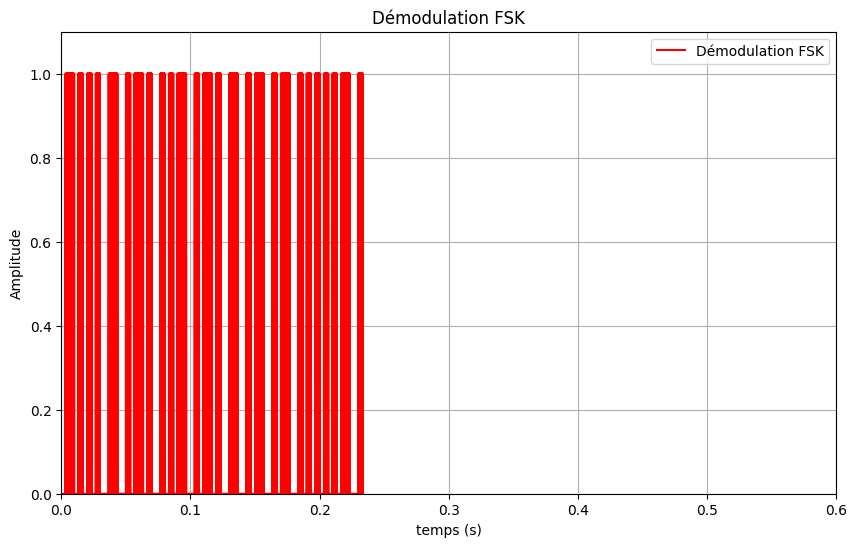

In [6]:
import numpy as np
import sounddevice as sd
import matplotlib.pyplot as plt

# Paramètres de la modulation
Fe = 44100
Fp1 = 900  # Fréquence pour le bit 1
Fp2 = 10000  # Fréquence pour le bit 0
baud = 300
Ns = int(Fe / baud)

# Génération des porteuses
t = np.arange(0.0, N) / Fe
P1 = np.sin(2 * np.pi * Fp1 * t)
P2 = np.sin(2 * np.pi * Fp2 * t)

# Réception du signal modulé FSK

signal_recu = FSK

# Ajustement des dimensions de P1 et P2
P1 = np.resize(P1, len(signal_recu))
P2 = np.resize(P2, len(signal_recu))

# Détecteur de phase
phase_diff_P1 = np.angle(signal_recu * np.conj(P1))
phase_diff_P2 = np.angle(signal_recu * np.conj(P2))

# Décodage en comparant les différences de phase
message_decode = np.where(phase_diff_P1 < phase_diff_P2, 1, 0)

# Affichage du signal démodulé
plt.figure(figsize=(10, 6))
plt.plot(t, message_decode, 'r', label='Démodulation FSK')
plt.title('Démodulation FSK')
plt.xlabel('temps (s)')
plt.ylabel('Amplitude')
plt.axis([0, 0.6, 0, 1.1])
plt.legend()
plt.grid()
plt.show()


In [7]:
def manchester_decode( message_code):
    decoded_data = []
    for i in range(0, len( message_code), 2):
        if  message_code[i] == 1 and  message_code[i + 1] == 0:
            decoded_data.append(1)
        elif  message_code[i] == 0 and  message_code[i + 1] == 1:
            decoded_data.append(0)
        else:
            raise ValueError("Invalid Manchester encoding")

    return decoded_data

 # Remplacez cela par votre séquence encodée
decoded_data = manchester_decode( message_code)

print("Séquence encodée de Manchester:",  message_code)
print("Séquence décodée de Manchester:", decoded_data)

Séquence encodée de Manchester: [0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1]
Séquence décodée de Manchester: [0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0]


In [8]:
# Décodage Manchester du message
decoded_message = []
for i in range(0, len(message_code), 2):
    if message_code[i] == 1 and message_code[i + 1] == 0:
        decoded_message.append(1)
    elif message_code[i] == 0 and message_code[i + 1] == 1:
        decoded_message.append(0)
    else:
        # Gestion d'erreur ou cas non pris en charge
        print("Erreur dans le signal Manchester")

# Convertir la liste de bits en une chaîne de caractères
decoded_message_str = ''.join(str(bit) for bit in decoded_message)

print("Message Manchester décodé :", decoded_message_str)
# Définition de la fonction de décodage CRC
def decodage(data_received, key):
    length_key = len(key)

    # La fonction de division euclidienne est utilisée sur les données reçues
    remainder = Division_eucl(data_received, key)

    # Si le reste est différent de zéro, il y a une erreur
    if int(remainder, 2) != 0:
        print("Erreur de transmission détectée. Les données peuvent être corrompues.")
    else:
        print("Aucune erreur de transmission détectée. Les données sont valides.")

# Exemple d'utilisation
data_received = encodage(total_binary, key)  # Simuler la réception des données encodées
print("Les données reçues sont :", data_received)

# Appel de la fonction de décodage
decodage(data_received, key)



Message Manchester décodé : 01111010011000100110100100100000010
Les données reçues sont : 01111010011000100110100100100000010
Erreur de transmission détectée. Les données peuvent être corrompues.


In [9]:
def calculer_paire_parity(message):
    count_ones = message.count('1')
    return count_ones % 2 == 0

def ajouter_paire_parity(message):
    count_ones = message.count('1')
    parity_bit = '0' if count_ones % 2 == 0 else '1'
    return message + parity_bit

def verifier_paire_parity(message_with_parity):
    count_ones = message_with_parity.count('1')
    return count_ones % 2 == 0

# Exemple d'utilisation
message_original = data # Un message binaire arbitraire

# Ajout de la parité
message_avec_parity = ajouter_paire_parity(message_original)

# Affichage des résultats
print(f"Message original: {message_original}")
print(f"Message avec parité: {message_avec_parity}")

# Vérification de la parité
parite_valide = verifier_paire_parity(message_avec_parity)

if parite_valide:
    print("La parité est valide. Aucune erreur détectée.")
else:
    print("Erreur détectée : la parité n'est pas valide.")


Message original: 01111010011000100110100100100000
Message avec parité: 011110100110001001101001001000001
La parité est valide. Aucune erreur détectée.


In [10]:
def binaire_vers_texte(binary_str):
    octets = [binary_str[i:i+8] for i in range(0, len(binary_str), 8)]
    texte = ''.join(chr(int(octet, 2)) for octet in octets)
    return texte

# Exemple d'utilisation avec votre chaîne binaire complète
message_binaire_complet =data_received   # Remplacez cela par votre propre chaîne binaire complète
message_texte = binaire_vers_texte(message_binaire_complet)

print("Message binaire complet :", message_binaire_complet)
print("Message texte obtenu :", message_texte)


Message binaire complet : 01111010011000100110100100100000010
Message texte obtenu : zbi 
